In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#reading the dataset
students_performance = pd.read_csv("StudentsPerformance.csv")

In [21]:
#Viewing the first five rows of the dataset
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
#viewing the last five rows of the dataset
students_performance.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [23]:
#summary of the data
students_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The students performance dataset contains no missing values. The data contains both string and integer values

In [24]:
#Finding out the number of columns in the dataset
students_performance.shape

(1000, 8)

The students performance dataset contains 1000 rows and 8 columns

In [25]:
#Descriptive statistics for the numeric columns
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Math score: 1000 scores were reported, the mean score was 66.08±15.16, the minimum/least score reported was 0 while the maximum/highest score reported was 100.
<br>Reading score: 1000 scores were reported, the mean score was 69.16±14.60, the minimum/least score reported was 17 while the maximum/highest score reported was 100.
<br> Writing score: 1000 scores were reported, the mean score was 68.05±15.20, the minimum/least score reported was 10 while the maximum/highest score reported was 100.

In [26]:
#students performance according to race
students_performance.groupby(["race/ethnicity"])[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


Students' performance according to the different races/ethnicity
<br> For math score, the group E race had the highest mean score out of the 5 groups while group A had the lowest mean score. 
<br> For the reading score, group E had the highest mean score while group A had the lowest mean score 
<br> For the writing score, group E had the highest mean score while group A had the lowest mean score.


In [27]:
#students performance according to test preparation taken
students_performance.groupby(["test preparation course"])[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


The students who completed the test preparation course had higher mean scores in Math, Reading and Writing than those who did not complete the course

# Exploratory Data Analysis

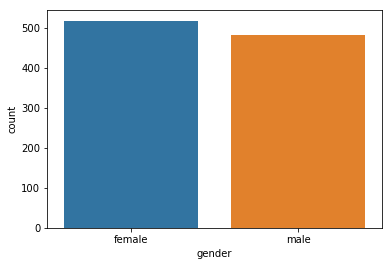

In [28]:
fig, ax= plt.subplots()
ax = sns.countplot(x="gender", data=students_performance)
plt.show()

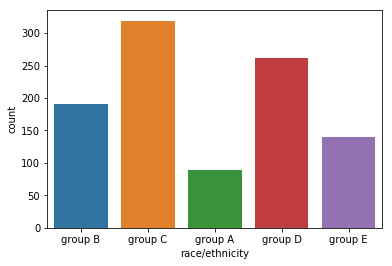

In [29]:
fig, ax= plt.subplots()
ax = sns.countplot(x="race/ethnicity", data=students_performance)
plt.show()

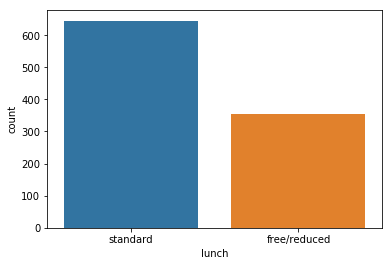

In [30]:
fig, ax= plt.subplots()
ax = sns.countplot(x="lunch", data=students_performance)
plt.show()

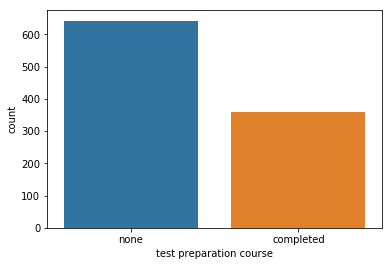

In [31]:
fig, ax= plt.subplots()
ax = sns.countplot(x="test preparation course", data=students_performance)
plt.show()

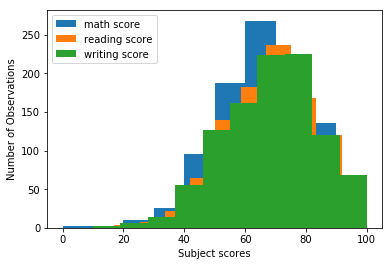

In [32]:
#Histogram plot showing the scores of the students
fig, ax = plt.subplots()
ax.hist(students_performance["math score"])
ax.hist(students_performance["reading score"])
ax.hist(students_performance["writing score"])
ax.set_xlabel('Subject scores')
ax.set_ylabel('Number of Observations')
ax.legend()
plt.show()

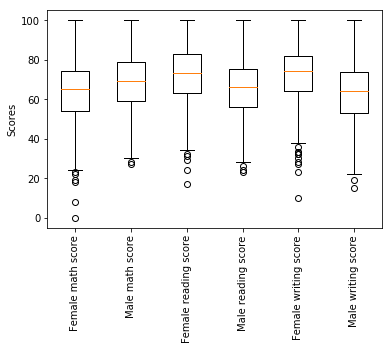

In [33]:
#selecting out female students
female_performance= students_performance[students_performance['gender']== 'female']
#selecting male students
male_performance= students_performance[students_performance['gender']== 'male']
#Box plot showing the performances of Male and Female students in the different subjects
fig, ax= plt.subplots()
ax.boxplot([female_performance['math score'], male_performance['math score'],female_performance['reading score'], male_performance['reading score'], female_performance['writing score'], male_performance['writing score']])
ax.set_xticklabels(['Female math score', 'Male math score', 'Female reading score', 'Male reading score', 'Female writing score', 'Male writing score'], rotation=90)
ax.set_ylabel('Scores')
plt.show()

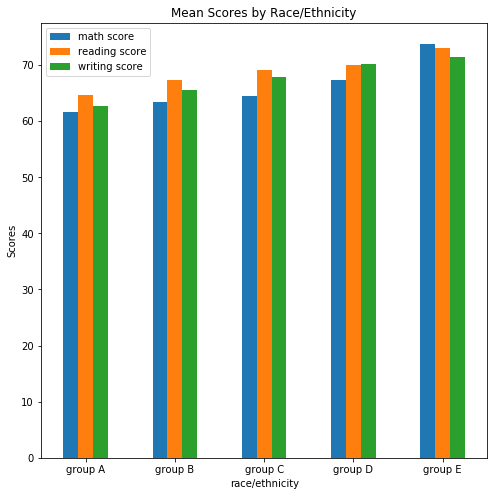

In [34]:
#math score according to race/ethnicity
mathscore_race= students_performance.groupby(["race/ethnicity"])[['math score','reading score', 'writing score' ]].mean()
mathscore_race.plot(kind= 'bar', figsize=(8, 8))
plt.ylabel('Scores')
plt.title('Mean Scores by Race/Ethnicity')
plt.xticks(rotation='horizontal')
plt.show()

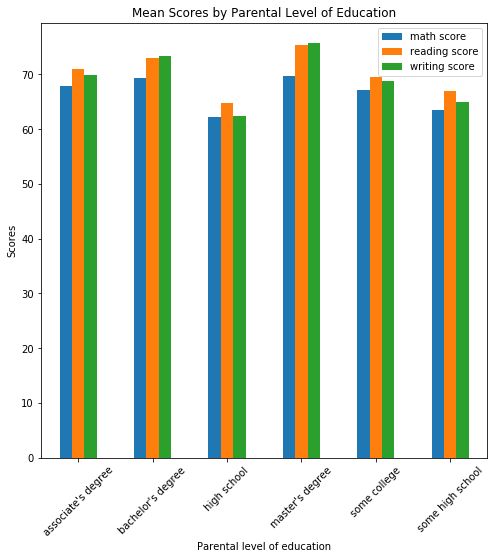

In [35]:
#Grouped Bar plot showing mean scores by parental level of education
testscore_parentaleducation= students_performance.groupby(['parental level of education'])[['math score','reading score', 'writing score' ]].mean()
testscore_parentaleducation.plot(kind= 'bar', figsize=(8, 8))
plt.ylabel('Scores')
plt.title('Mean Scores by Parental Level of Education')
plt.xlabel('Parental level of education')
plt.xticks(rotation=45)
plt.legend()
plt.show()

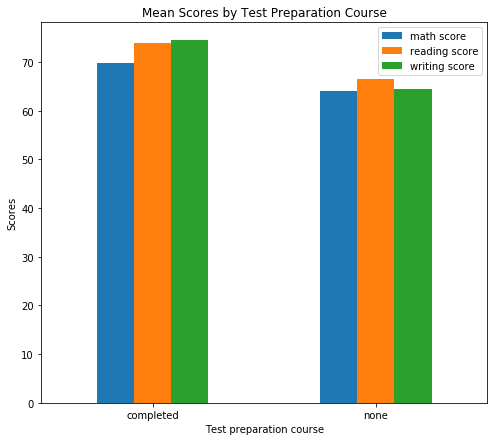

In [36]:
#Grouping the students performance according to completion of the test preparation course
testscore_prepcourse= students_performance.groupby(['test preparation course'])[['math score','reading score', 'writing score' ]].mean()
#Groupedbar plot showing students performance according to test preparation course
testscore_prepcourse.plot(kind= 'bar', figsize=(8,7))
plt.xlabel('Test preparation course')
plt.ylabel('Scores')
plt.title('Mean Scores by Test Preparation Course')
plt.xticks(rotation='horizontal')
plt.legend()
plt.show()
